# UNIT 1. Import and Visualitzation of data with Python

This Unit includes some fast shortcuts to representing data in Python, closely following {cite:p}`kroese2020` and the corresponding [GitHub repo](https://github.com/DSML-book/).

NOTE: being this a training tool, we assume the user will have installed all the needed requirements. In case some package is missing, use a terminal to install it apart using your favorite package manager.

These notebooks have been tested in Linux Ubuntu using Anaconda as the package manager in most cases. The notebooks are self-containing.

## Retrieving data

Typically the files containing data to be analyzed are stored in comma separated value (CSV) format. To work with them, the first thing to do is downloading the data. But before we ensure we have a proper folder to download the file.

In [1]:
import os

input_directory = "datasets"
output_directory = 'output'

# Check if the directories exist
if not os.path.exists(input_directory):
    # If it doesn't exist, create it
    os.makedirs(input_directory)
else:
    print('folder ',input_directory,' exists')

if not os.path.exists(output_directory):
    # If it doesn't exist, create it
    os.makedirs(output_directory)
else:
    print('folder ',output_directory,' exists')

# now use wget to download the file into the datasets folder
!wget -P $input_directory -nc https://archive.ics.uci.edu/static/public/109/wine.zip 

folder  datasets  exists
folder  output  exists
El fitxer ‘datasets/wine.zip’ ja existeix, no es baixa.



Now, we read the content of the zip file using the `pandas` module. Information of the data can be found in the [ML repository at UCI](https://archive.ics.uci.edu/dataset/109/wine).

In [2]:
import pandas as pd
from zipfile import ZipFile

with ZipFile('datasets/wine.zip', 'r') as f:

#extract in current directory
    f.extractall(input_directory, members =['wine.names',"wine.data"])

wine = pd.read_csv('datasets/wine.data',header=None)
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


as we do not have the names of the columns, we can manually assign them based on the information contained in the web link.

In [3]:
wine.columns = ['class','Alcohol','Maliacid','Ash','Alcalinity_of_ash','Magnesium','Total_phenols','Flavanoids','Nonflavonoid_phenols','Proanthocyanins','Color_intensity','Hue','0D280_0D315_of_diluted_wines','Proline']
wine.head()

,class,Alcohol,Maliacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavonoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Alternatively, we can directly read the CSV from its URL, without previously downloading it. We will use [Fisher's `iris` data](https://vincentarelbundock.github.io/Rdatasets/doc/datasets/iris.html). Here we already have the name of the columns/features so we read them directly from the dataset.


In [4]:
dataname = 'https://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv'

iris = pd.read_csv(dataname)
iris.head()

,rownames,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


as the first column is a duplicated index column, we can remove it

In [5]:
iris.drop('rownames', axis=1)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Reformating tables

Some times tha data comes in odd formats, not useful for analysis.

For example, consider the table with scores given here, with values obtained before and after some particular training:

![scores](../figures/scores.png)

We want to reformat it in such a way that the score data is in a single column. Let us create a table that uses three features: *Score* (continuous data), *Time* (before or after) and *Student* (integer values from 1 to 5). We will use the `pandas.melt` method, [speciffically devoted to this goal](https://pandas.pydata.org/docs/reference/api/pandas.melt.html).


In [6]:
# manually create dataframe with data from table
values = [[1 ,75 ,85] ,[2 ,30 ,50] ,[3 ,100 ,100] ,[4 ,50 ,52] ,[5 ,60 ,65]]
import pandas as pd
df = pd. DataFrame (values , columns =['Student ','Before ', 'After '])
# format dataframe as required
df = pd.melt(df , id_vars =['Student '], var_name ="Time", value_vars =['Before ','After '])
print(df)

   Student      Time  value
0         1  Before      75
1         2  Before      30
2         3  Before     100
3         4  Before      50
4         5  Before      60
5         1   After      85
6         2   After      50
7         3   After     100
8         4   After      52
9         5   After      65


## Structuring features

Types of features:
* Quantitive (with possible discrete or continuous values)
* Qualitative; can be eventually divided into a fixed number of categories: that is why they are referred as **categorical** or **factors**.

Here we will work with data from {cite:p}`lafaye_de_micheaux_r_2013`. In particular, we will download the file containing nutritional measurements of thirteen features (columns) for 226 elderly individuals (rows). Note the [file](http://www.biostatisticien.eu/springeR/nutrition_elderly.xls) is now an excel file.

In [7]:
xls = 'http://www.biostatisticien.eu/springeR/nutrition_elderly.xls'
nutri = pd.read_excel(xls)

pd.set_option('display.max_columns', 8)
nutri.head()

,gender,situation,tea,coffee,...,raw_fruit,cooked_fruit_veg,chocol,fat
0,2,1,0,0,...,1,4,5,6
1,2,1,1,1,...,5,5,1,4
2,2,1,0,4,...,5,2,5,4
3,2,1,0,0,...,4,0,3,2
4,2,1,2,1,...,5,5,3,2


to check the structure of the data we can use the `info` attribute of the `pandas` dataframe, which matches the description that is given in the original source

![description](../figures/nutriage-en.png)

Note the features can be classified as

* qualitative
    * ordinal (meat, fish, raw_fruit, cooked_fruit_veg,chocol)
    * nominal (gender, situation), fat
* quantitative
    * discrete (tea, coffee)
    * continuous (height, weight, age)

In [8]:
nutri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            226 non-null    int64
 1   situation         226 non-null    int64
 2   tea               226 non-null    int64
 3   coffee            226 non-null    int64
 4   height            226 non-null    int64
 5   weight            226 non-null    int64
 6   age               226 non-null    int64
 7   meat              226 non-null    int64
 8   fish              226 non-null    int64
 9   raw_fruit         226 non-null    int64
 10  cooked_fruit_veg  226 non-null    int64
 11  chocol            226 non-null    int64
 12  fat               226 non-null    int64
dtypes: int64(13)
memory usage: 23.1 KB


let us change now the data value and type of different features by means of the `replace` and the `astype` methods, and finally save the data in CSV format.

In [9]:
# gender, situation, meat, fish, raw_fruit, cooked_fruit_veg chocol and fat feature are categorical
DICT = {1:'Male',2:'Female'}
nutri['gender'] = nutri['gender'].replace(DICT).astype('category')

DICT = {1:'single',2:'couple',3:'family',4:'other'}
nutri['situation'] = nutri['situation'].replace(DICT).astype('category')

DICT = {0:'never',1:'less than once a week',2:'once a week',3:'2-3 times a week',4:'4-6 times a week', 5:'every day'}
nutri['meat'] = nutri['meat'].replace(DICT).astype('category')
nutri['fish'] = nutri['fish'].replace(DICT).astype('category')
nutri['raw_fruit'] = nutri['raw_fruit'].replace(DICT).astype('category')
nutri['cooked_fruit_veg'] = nutri['cooked_fruit_veg'].replace(DICT).astype('category')
nutri['chocol'] = nutri['chocol'].replace(DICT).astype('category')

DICT = {1:'Butter',2:'Margarine',3:'Peanut oil', 4:'Sunflower oil', 5:'Olive oil', 6:'Mix of vegetable oils', 7:'Colza oil',8:'Duck or goose fat'}
nutri['fat'] = nutri['fat'].replace(DICT).astype('category')

# tea and coffee are integer
nutri['tea'] = nutri['tea'].astype(int)
nutri['coffee'] = nutri['coffee'].astype(int)

# height, weigth, age are float
nutri['height'] = nutri['height'].astype(float)
nutri['weight'] = nutri['weight'].astype(float)
nutri['age'] = nutri['age'].astype(float)

nutri.head()


,gender,situation,tea,coffee,...,raw_fruit,cooked_fruit_veg,chocol,fat
0,Female,single,0,0,...,less than once a week,4-6 times a week,every day,Mix of vegetable oils
1,Female,single,1,1,...,every day,every day,less than once a week,Sunflower oil
2,Female,single,0,4,...,every day,once a week,every day,Sunflower oil
3,Female,single,0,0,...,4-6 times a week,never,2-3 times a week,Margarine
4,Female,single,2,1,...,every day,every day,2-3 times a week,Margarine


In [10]:

nutri.info()

nutri.to_csv('output/nutri.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            226 non-null    category
 1   situation         226 non-null    category
 2   tea               226 non-null    int64   
 3   coffee            226 non-null    int64   
 4   height            226 non-null    float64 
 5   weight            226 non-null    float64 
 6   age               226 non-null    float64 
 7   meat              226 non-null    category
 8   fish              226 non-null    category
 9   raw_fruit         226 non-null    category
 10  cooked_fruit_veg  226 non-null    category
 11  chocol            226 non-null    category
 12  fat               226 non-null    category
dtypes: category(8), float64(3), int64(2)
memory usage: 12.4 KB


## Summary tables and statistics

It is extremely important to know your data before any analysis. Apart from the descriptive tools shown above, descriptive statistical measurements can be obtained from pandas with two simple methods: `describe` and `value_counts`. Interesting to note that the outcome of both `describe` and `value_counts` are pandas *series*, one-dimensional ndarrays with axis labels.

In [11]:
nutri = pd.read_csv('output/nutri.csv')
nutri['fat'].describe()


count               226
unique                8
top       Sunflower oil
freq                 68
Name: fat, dtype: object

In [12]:
nutri['fat'].value_counts()

fat
Sunflower oil            68
Peanut oil               48
Olive oil                40
Margarine                27
Mix of vegetable oils    23
Butter                   15
Duck or goose fat         4
Colza oil                 1
Name: count, dtype: int64

We can also generate a contingey table by *cross tabulating* between two or more variables:

In [13]:
pd.crosstab(nutri.gender,nutri.situation,margins=True) # the margins attribute adds the rows/columns totals

situation,couple,family,single,All
gender,,,,
Female,56,7,78,141
Male,63,2,20,85
All,119,9,98,226


we can now turn to descriptive statistics like the *sample mean*, $\bar{x}$:
$$\bar{x}=\frac{1}{n}\sum_{i=1}^n x_i$$


In [14]:
nutri.height.mean()

163.96017699115043

and the *p-sample quantile* of $\mathbf{x}$, being $0 <p <1$, which refers to the value $x$ such that at least a fraction $p$ of the data is less than or equal to $x$ and at least a fraction $1-p$ is greater or equals to $x$. Thus, the *sample median* is the sample 0.5-quatile. For our `nutri` data the first (25), second (50) and third (75% percentile of the data) can be obtained as:

In [15]:
nutri.height.quantile(q=[0.25,0.5,0.75])

0.25    157.0
0.50    163.0
0.75    170.0
Name: height, dtype: float64

If, in addition to the location of the data we are interested in its dispersions, we can start by obtaining the range


In [16]:

nutri.height.max()-nutri.height.min()

48.0

Next, we can calculate the *sample variance* as
$$s^2 = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})^2$$

In [17]:
round(nutri.height.var(),2)

81.06

or the *standard deviation* as $s=\sqrt{s^2}$ or, better:

In [18]:
round(nutri.height.std(),2)

9.0

or simply make use of the `describe` method shown above, taking profit of the quantitative type of the *height* data

In [19]:
nutri.height.describe()

count    226.000000
mean     163.960177
std        9.003368
min      140.000000
25%      157.000000
50%      163.000000
75%      170.000000
max      188.000000
Name: height, dtype: float64

## Data visualization

Depending on the data type, data visualization will differ. In order to use the visualization power of Python , first we will import the `matplotlib.pyplot` module, as well as `numpy`, in addition to the already imported `pandas` module.

In [20]:
import matplotlib.pyplot as plt
import numpy as np

### Qualitative variables

here we can show the data in a simple bar plot, taking itno account that the category (x-axis) is not per se a numerical value, so we should manually place the different categories in the plot. 

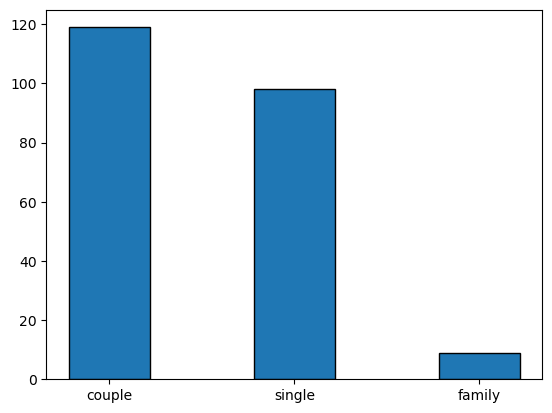

In [21]:

width = 0.35  # the width of the bars
x = [0, 0.8, 1.6]    # position of the bars
situation_counts = nutri.situation.value_counts()  # note that situation_counts is a pandas series
plt.bar(x,situation_counts,width,edgecolor='black')
plt.xticks(x,situation_counts.index)
plt.show()

### Quantitative variables

Such type oif variables allow for more complex graphical representation. We will see some possibilities. We are in particular interested in visualizing the location, dispersion and shae of the data.

The first example is visualizing data with a boxplot, that gives information on the location and dispersion, showing also outliers (data $x_i$ that is beyond the whiskers of the boxplot, this is, $x_i<Q_1-1.5 (Q_3-Q_1)$ or $x_i>Q_3+1.5 (Q_3-Q_1)$, being $Q_3-Q_1$ called *interquantile range* or IQR).

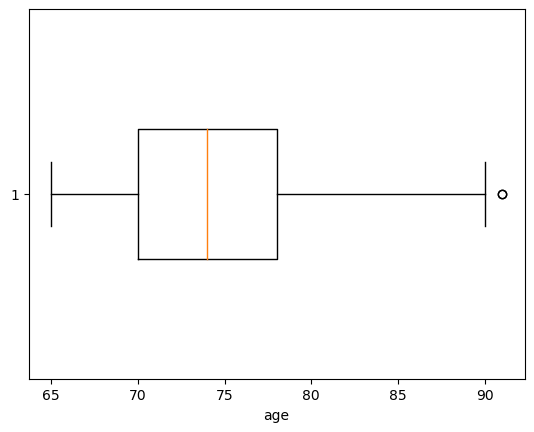

In [22]:
plt.boxplot(nutri.age,widths=width,vert=False)  # the vert controls the verticality of the plot
plt.xlabel('age')
plt.show()

In a slightly more complex setup, we can compare two different categories in the boxplot:

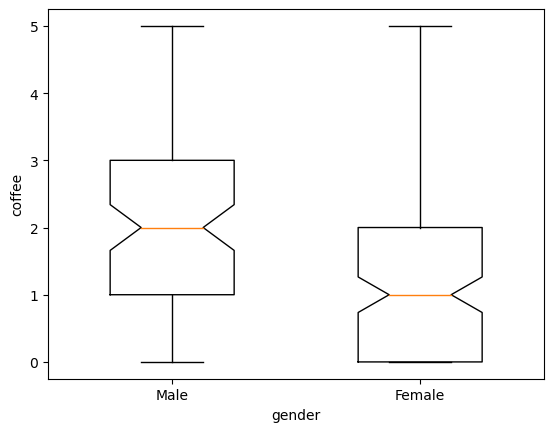

In [23]:
males = nutri[nutri.gender == 'Male']
females = nutri[nutri.gender == 'Female']
plt.boxplot([males.coffee, females.coffee], notch =True , widths=(0.5 ,0.5))
plt.xlabel ('gender')
plt.ylabel ('coffee')
plt.xticks ([1 ,2] ,['Male','Female'])
plt.show()

we can also show the distribution of the data using a histogram, after breaking the data into *bins* or *classes*

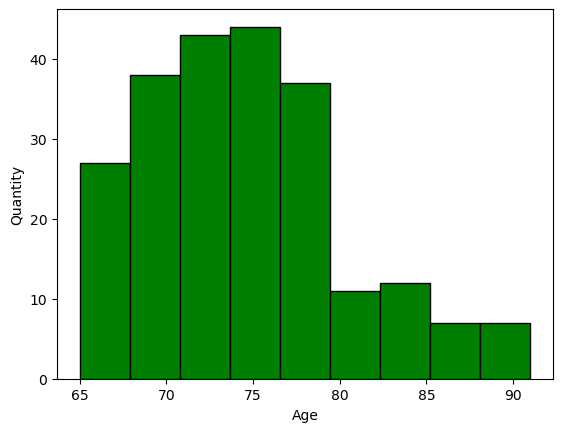

In [24]:
plt.hist(nutri.age,bins=9,facecolor='green',edgecolor='black',linewidth=1)
plt.xlabel('Age')
plt.ylabel('Quantity')
plt.show()

alternatively, we can weigth the values to show $\frac{counts}{total}$ by using the trick of multiplying all values times the quantity $1/266$.

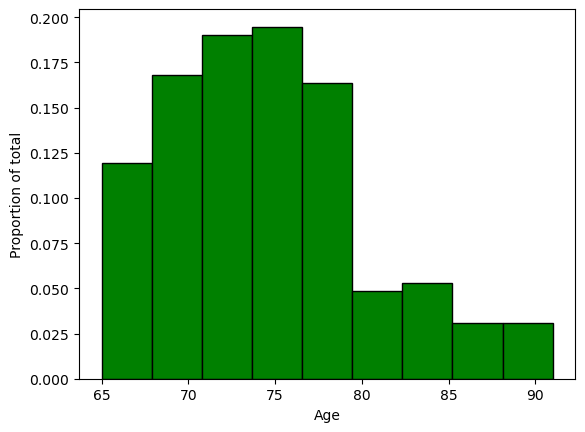

In [25]:
weigths = np.ones_like(nutri.age)/nutri.age.count()
plt.hist(nutri.age,bins=9,weights=weigths,facecolor='green',edgecolor='black',linewidth=1)
plt.xlabel('Age')
plt.ylabel('Proportion of total')
plt.show()

The *empirical cumulative distribution function*, $F_n$, is a step function that jupms $k/n$ at observation values, where $k$ is the fraction of tied observations at that value:
$$F_n(x)=\frac{\mathrm{number \; of \; }x_i \leq x}{n}$$
The function can be defined and plotted in the same way for both discrete and continuous data.

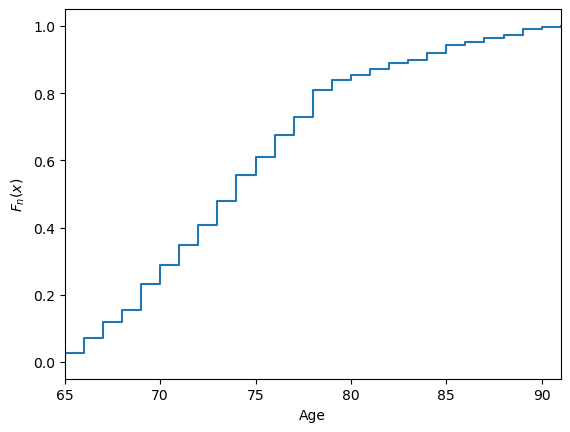

In [26]:
x = np.sort(nutri.age)
y = np.linspace(0,1,len(nutri.age))
plt.xlabel('Age')
plt.ylabel('$F_n(x)$')
plt.step(x,y)
plt.xlim(x.min(),x.max())
plt.show()

Next, let us have a look at a plot that takes into account the contingency table shown above. We will make use now of the `seaborn` package, which simplifies the plotting of statistical information.

TODO: add examples with sns.histplot()

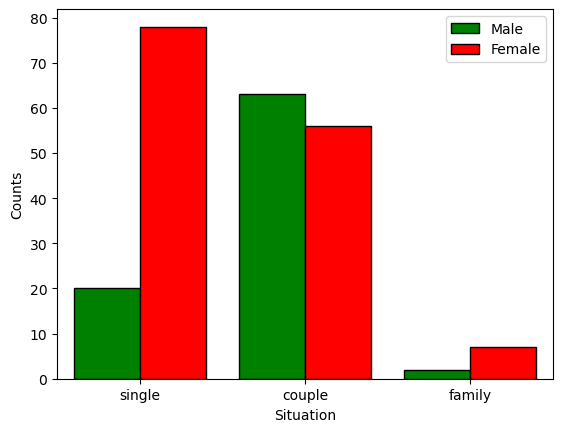

In [27]:
import seaborn as sns
sns.countplot(x='situation',hue='gender',data=nutri,hue_order=['Male','Female'],palette=['green','red'],saturation=1,edgecolor='black')
plt.legend(loc='upper right')
plt.xlabel('Situation')
plt.ylabel('Counts')
plt.show()

*Scatter plots* are useful to visualize patterns between quantitative features.

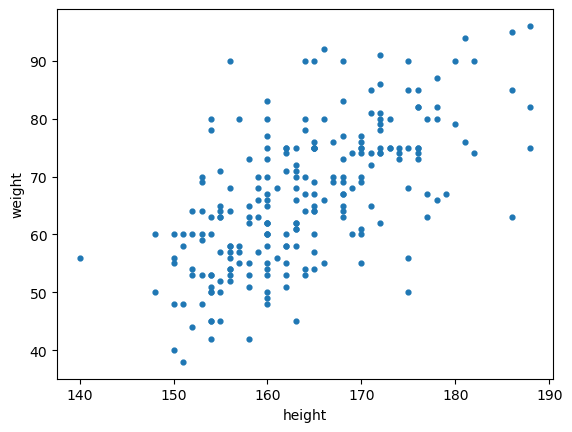

In [28]:
plt.scatter(nutri.height,nutri.weight,s=12,marker='o')
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

We can get more sophisticated plots and fit some lines to the data to visualy compare data. In this example, we will use data from Vincent Arel Bundock repo on birth weights of babies for smoking and non smoking mothers, and plot the data againts the age of the mother. We will deal with significance of the results in upcoming sessions.

In [29]:
urlprefix = 'http://vincentarelbundock.github.io/Rdatasets/csv/'
dataname = 'MASS/birthwt.csv'
bwt = pd.read_csv(urlprefix + dataname)
bwt = bwt.drop('rownames' ,axis=1)  #drop unnamed column
bwt


,low,age,lwt,race,...,ht,ui,ftv,bwt
0,0,19,182,2,...,0,1,0,2523
1,0,33,155,3,...,0,0,3,2551
2,0,20,105,1,...,0,0,1,2557
3,0,21,108,1,...,0,1,2,2594
4,0,18,107,1,...,0,1,0,2600
...,...,...,...,...,...,...,...,...,...
184,1,28,95,1,...,0,0,2,2466
185,1,14,100,3,...,0,0,2,2495
186,1,23,94,3,...,0,0,0,2495
187,1,17,142,2,...,1,0,0,2495


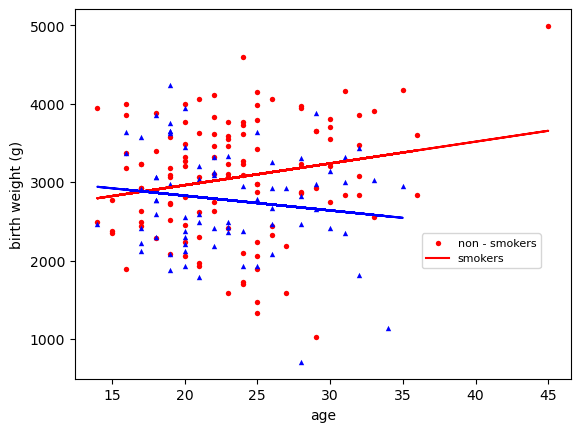

In [30]:
styles = {0: ['o','red'], 1: ['^','blue']}
for k in styles:
    grp = bwt[bwt.smoke == k]
    m,b = np.polyfit(grp.age , grp.bwt , 1) # fit a straight line
    plt.scatter(grp.age , grp.bwt , c= styles[k][1] , s=15 , linewidth =0,
                 marker = styles[k][0])
    plt.plot(grp.age , m*grp.age + b, '-', color = styles[k][1])

plt.xlabel('age')
plt.ylabel('birth weight (g)')
plt.legend(['non - smokers','smokers'],prop={'size':8},loc=(0.7 ,0.3))
plt.show()